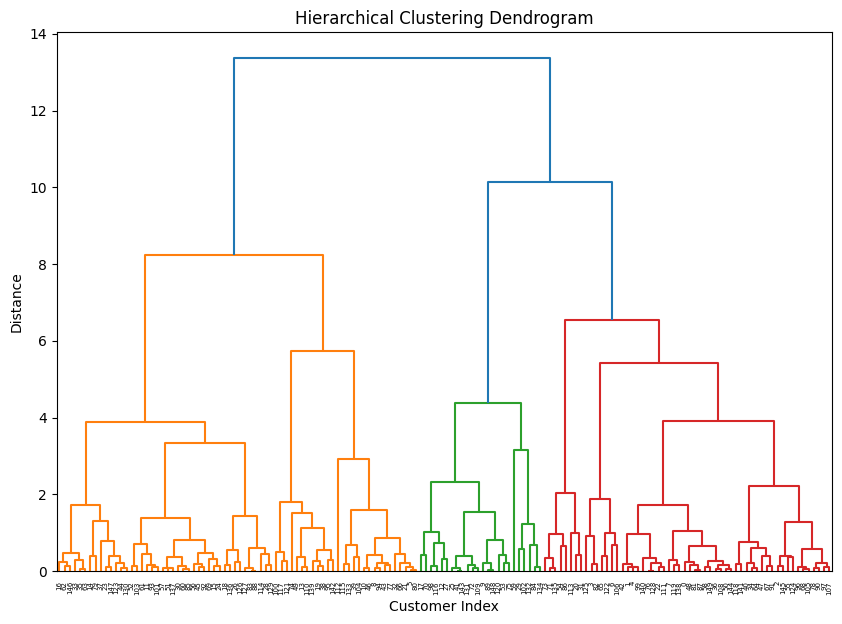

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Step 1: Generate a synthetic customer dataset (e.g., Income and Spending Score)
np.random.seed(42)
n_samples = 150
income = np.random.normal(loc=50, scale=20, size=n_samples)  # Simulated income
spending_score = np.random.normal(loc=60, scale=25, size=n_samples)  # Simulated spending score

# Combine into a DataFrame
customer_data = pd.DataFrame({'Income': income, 'SpendingScore': spending_score})

# Step 2: Standardize the data (important for clustering algorithms)
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data)

# Step 3: Perform Agglomerative Hierarchical Clustering
# We use the 'ward' method, which minimizes variance within clusters.
Z = linkage(customer_data_scaled, method='ward')

# Step 4: Visualize the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customer Index")
plt.ylabel("Distance")
plt.show()

# Step 5: Apply Agglomerative Clustering with a specific number of clusters
# Let's assume we want 4 clusters based on the dendrogram
hierarchical = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
customer_data['Cluster'] = hierarchical.fit_predict(customer_data_scaled)

# Step 6: Visualize the customer segmentation (scatter plot with clusters)
plt.figure(figsize=(8, 6))
plt.scatter(customer_data['Income'], customer_data['SpendingScore'], c=customer_data['Cluster'], cmap='viridis', s=50)
plt.title("Customer Segmentation Using Hierarchical Clustering")
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.colorbar(label="Cluster Label")
plt.show()

# Print a sample of the customer data with their clusters
print("\nSample of customer data with assigned clusters:")
print(customer_data.head())
